In [1]:
from tqdm import tqdm
import math
import numpy as np
import tensorflow as tf
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer 
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import nltk
#nltk.download()
from nltk.corpus import brown
brown.categories()
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle
import gensim
from gensim.models import word2vec

F:\wuren\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\wuren\Miniconda3\envs\carnd-term1\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
news = fetch_20newsgroups(subset='all')
print(len(news.data))
print(news.data[0])
print(news.target[0])
ids = list(set(news.target))
print(ids)

18846
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0]
[799.0, 973.0, 985.0, 982.0, 963.0, 988.0, 975.0, 990.0, 996.0, 994.0, 999.0, 991.0, 984.0, 990.0, 987.0, 997.0, 910.0, 940.0, 775.0, 628.0]
20


TypeError: text() missing 1 required positional argument: 's'

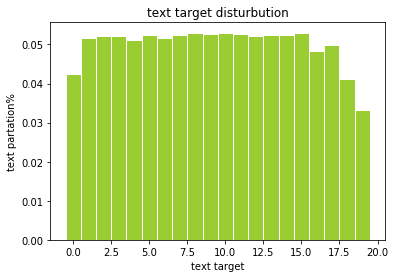

In [3]:
dict = {0.:0., 1.:0., 2.:0., 3.:0., 4.:0., 5.:0., 6.:0., 7.:0., 8.:0., 9.:0., 10.:0., 11.:0., 12.:0., 13.:0., 14.:0., 15.:0., 16.:0., 17.:0., 18.:0., 19.:0.}
for i, _ in enumerate(news.target):
    if news.target[i]==0:
        dict[0.] = dict[0.] + 1.
    if news.target[i]==1:
        dict[1.] = dict[1.] + 1.
    if news.target[i]==2:
        dict[2.] = dict[2.] + 1.
    if news.target[i]==3:
        dict[3.] = dict[3.] + 1.
    if news.target[i]==4:
        dict[4.] = dict[4.] + 1.
    if news.target[i]==5:
        dict[5.] = dict[5.] + 1.
    if news.target[i]==6:
        dict[6.] = dict[6.] + 1.
    if news.target[i]==7:
        dict[7.] = dict[7.] + 1.
    if news.target[i]==8:
        dict[8.] = dict[8.] + 1.
    if news.target[i]==9:
        dict[9.] = dict[9.] + 1.
    if news.target[i]==10:
        dict[10.] = dict[10.] + 1.
    if news.target[i]==11:
        dict[11.] = dict[11.] + 1.
    if news.target[i]==12:
        dict[12.] = dict[12.] + 1.
    if news.target[i]==13:
        dict[13.] = dict[13.] + 1.
    if news.target[i]==14:
        dict[14.] = dict[14.] + 1.
    if news.target[i]==15:
        dict[15.] = dict[15.] + 1.
    if news.target[i]==16:
        dict[16.] = dict[16.] + 1.
    if news.target[i]==17:
        dict[17.] = dict[17.] + 1.
    if news.target[i]==18:
        dict[18.] = dict[18.] + 1.
    if news.target[i]==19:
        dict[19.] = dict[19.] + 1.

x = list(dict.keys())
print(x)
y = list(dict.values())
print(y)
for i, _ in enumerate(y):
    y[i] = y[i] / 18846.
print(len(y))

plt.xlabel('text target')
plt.ylabel('text partation%')
plt.title("text target disturbution")

plt.bar(left=x, height=y, width=1.0, facecolor = 'yellowgreen', edgecolor = 'white')

for xx,yy in zip(x,y):
    plt.text(xx, yy, ha='center', va= 'bottom')

plt.ylim(0,0.07)
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(news.data,news.target,test_size=0.25,random_state=33)
count_v1= CountVectorizer(stop_words = 'english', max_df = 0.5)
counts_train = count_v1.fit_transform(X_train)
print ("the shape of train is "+repr(counts_train.shape))

the shape of train is (14134, 150409)


In [5]:
count_v2 = CountVectorizer(vocabulary=count_v1.vocabulary_)
counts_test = count_v2.fit_transform(X_test)
print ("the shape of test is "+repr(counts_test.shape))

the shape of test is (4712, 150409)


In [6]:
tfidftransformer = TfidfTransformer()
tfidf_train = tfidftransformer.fit(counts_train).transform(counts_train)
tfidf_test = tfidftransformer.fit(counts_test).transform(counts_test)

In [7]:
mnb = MultinomialNB(alpha = 0.01)
mnb.fit(tfidf_train, y_train)
m_pred = mnb.predict(tfidf_test)
m_precision = metrics.precision_score(y_test, m_pred, average='micro')
print ('precision:{0:.3f}'.format(m_precision))

precision:0.916


In [8]:
svc = SVC(kernel = 'linear')
svc.fit(tfidf_train, y_train)
s_pred = svc.predict(tfidf_test)
s_precision = metrics.precision_score(y_test, s_pred, average='micro')
print ('precision:{0:.3f}'.format(s_precision))

precision:0.919


In [9]:
wordnet_lemmatizer = WordNetLemmatizer()
emoticons_str = r"""
(?:
[:=;] 
[oO\-]? 
[D\)\]\(\]/\\OpP] 
)"""
regex_str = [
emoticons_str,
r'<[^>]+>', 
r'(?:@[\w_]+)', 
r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", 
r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
r'(?:(?:\d+,?)+(?:\.?\d+)?)', 
r"(?:[a-z][a-z'\-_]+[a-z])", 
r'(?:[\w_]+)', 
r'(?:\S)' 
]
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

In [10]:
def tokenize(s):
    return tokens_re.findall(s)

In [11]:
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [12]:
sample = []
a = [',', '"', ';', '(', ')', '--', '>', '<', '|', '+', '-', '*', '/', '[', ']', '{', '}', '^', ':', '\'', '=', '_', '#', '~', '@', '$', '%', '\\', '__', '___________________________________', '&']
for i, t in enumerate(news.data):
    mm = str(t)
    l = mm.split("\n")
    a1=-1
    b1=-1
    for j, s in enumerate(l):
        ss = s.split(" ")
        if ss[0]=="begin":
            a1 = j
        if ss[0]=="end":
            b1 = j
    if a1!=-1 and b1!=-1:
        del l[a1:b1+1]
    k=0
    while k<len(l):    
        if len(l[k])==0:
            del l[k]
        else:
            k += 1
    texts = []
    for s in l:
        text = preprocess(s, True)
        text = [word for word in text if word not in a]
        text = [word for word in text if word not in stopwords.words('english')]
        my_words = nltk.pos_tag(text)
        sub_text = []
        for word in my_words:
            if word[1]=='VB':
                ii = wordnet_lemmatizer.lemmatize(word[0], pos='v')
                sub_text.append(ii)
            else:
                ii = wordnet_lemmatizer.lemmatize(word[0])
                sub_text.append(ii)
        texts.append(sub_text)
    sample.append(texts)

In [13]:
for t in sample:
    c1 = []
    for j, s in enumerate(t):
        if len(s)!=0 and s[0]=="cut":
            c1.append(j)
    if len(c1)==2:
        del t[c1[0]:c1[1]+1]

In [14]:
for t in sample:   
    a1=-1
    b1=-1
    for j, s in enumerate(t):
        if len(s)!=0 and s[0]=="begin":
            a1 = j
        if len(s)!=0 and s[0]=="end":
            b1 = j
    if a1!=-1 and b1!=-1:
        del t[a1:b1+1]

In [15]:
X_sample = []
for t in sample:
    m=0
    n=0
    f=False
    l=0
    r=0
    my_texts=[]
    for s in t:
        subb=[]
        eee=[]
        for j, tt in enumerate(s):
            if tt=="." and f==False:
                m=j
                f=True
                continue
            if tt=="." and f:
                n=j
                f=False
            
            if m==0:
                continue
            if j-m==2 and n==0:
                m=0
                f=False
            y=n-m    
            if m!=0 and n!=0 and y==2:
                l=m-1
            if m!=0 and n!=0 and y==-2:
                r=m+1
                m=0
                n=0
                f=False
                
            if l!=0 and r!=0:
                for p in range(l, r+1):
                    eee.append(p)
                l=0
                r=0
                
        for j, tt in enumerate(s):
            if j in eee:
                continue
            subb.append(tt)
        my_texts.append(subb)
        m=0
        n=0
        l=0
        r=0
        f=False
    X_sample.append(my_texts)

In [16]:
d = [".", "!", "?"]
X = []
for t in X_sample:
    XX = []
    for i, tt in enumerate(t):
        k = 0
        flag = True
        for j, w in enumerate(tt):
            if w in d:
                b = tt[k:j]
                flag = False
                XX.append(b)
                k = j+1     
        if flag:
            XX.append(tt)
    X.append(XX)

In [17]:
for t in X:
    j = 0
    while j<len(t):    
        if len(t[j])==0:
            del t[j]
        else:
            j += 1

In [18]:
for t in X:   
    a1=-1
    b1=-1
    for j, s in enumerate(t):
        if len(s)!=0 and s[0]=="part":
            a1 = j
        if len(s)!=0 and s[0]=="end":
            b1 = j
    if a1!=-1 and b1!=-1:
        del t[a1:b1+1]

In [19]:
for t in X:
    j = 0
    while j<len(t):    
        if len(t[j])<=1:
            del t[j]
        else:
            j += 1

In [20]:
for t in X:
    j = 0
    while j<len(t):    
        if t[j][0]=='\x08':
            del t[j]
        else:
            j += 1

In [21]:
max_len = 0
max_list = 0
tmp1=0
tmp2=0
for i, t in enumerate(X):
    if max_list<len(t):
        max_list = len(t)
        tmp1 = i
    for j, s in enumerate(t):
        if max_len<len(s):
            max_len = len(s)
            tmp2 = i
print (max_len)
print (max_list)
print (tmp1)
print (tmp2)

40
1345
2694
4378


In [22]:
del X[2694]
Y = []
for i in news.target:
    Y.append(i)
del Y[2694]

In [23]:
output = open("./sample_X", 'wb')
pickle.dump(X, output)
db = open("./sample_X", 'rb')
X = pickle.load(db)
output1 = open("./sample_Y", 'wb')
pickle.dump(Y, output1)
db1 = open("./sample_Y", 'rb')
Y = pickle.load(db1)

In [3]:
class MySentences(object):
    def __init__(self, texts, max_len):
        self.texts = texts
        self.max_len = max_len
    def __del__(self):
        print ('over')
    def __iter__(self):
        for t in self.texts:
            for s in t:
                if self.max_len<len(s):
                    self.max_len = len(s)
                yield s
        return word2vec.Text8Corpus("./text8")

In [4]:
sentences = MySentences(X, 0)
model = word2vec.Word2Vec(sentences, min_count=1, size=100)

In [5]:
k=1
em_sen={}
for w, _ in model.wv.vocab.items():
    em_sen[w] = k
    k = k + 1

i=1
em_mx = np.zeros((len(model.wv.vocab) + 1, 100), dtype=np.float32)
for w, v in model.wv.vocab.items():
    em_mx[i] = model[w].reshape((1,100))
    i = i + 1

F:\wuren\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [3]:
output3 = open("./em_sen", 'wb')
pickle.dump(em_sen, output3)
db3 = open("./em_sen", 'rb')
em_sen = pickle.load(db3)

In [7]:
output4 = open("./em_mx", 'wb')
pickle.dump(em_mx, output4)
db4 = open("./em_mx", 'rb')
em_mx = pickle.load(db4)

In [6]:
max_len = sentences.max_len
del sentences
print (max_len)
max_len = 100
d = {}
index = 0

over
40


In [3]:
def div_xy(X_, Y_, le, id):
    global index, d
    h=0
    for s in X_:
        h+=len(s)
    t = int(h/le)
    if t>0:
        if h%le==0:
            m = ""
            ff=np.zeros((t, le), dtype=np.int32)
            y=[]
            for ii in range(t):
                y.append(Y_)
            tmp=0
            e=0
            for j, s in enumerate(X_):
                tmp+=len(s)
                if j==len(X_)-1:
                    if tmp<=le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            m += str(em_sen[w]) + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                m += str(em_sen[w]) + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                else:
                    if tmp<le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                    elif tmp==le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            m += str(em_sen[w]) + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                m += str(em_sen[w]) + " "
            return ff, y
        else:
            m = ""
            ff=np.zeros((t+1, le), dtype=np.int32)
            y=[]
            for ii in range(t+1):
                y.append(Y_)
            tmp=0
            e=0
            for j, s in enumerate(X_):
                tmp+=len(s)
                if j==len(X_)-1:
                    if tmp<=le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            m += str(em_sen[w]) + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                m += str(em_sen[w]) + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                else:
                    if tmp<le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                    elif tmp==le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            m += str(em_sen[w]) + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        d[index] = id
                        index += 1
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                m += str(em_sen[w]) + " " 
            return ff, y
    else:
        m = ""
        ff=np.zeros((1, le), dtype=np.int32)
        y=[]
        y.append(Y_)
        tmp=0
        e=0
        for j, s in enumerate(X_):
            tmp+=len(s)
            for w in s:
                m += str(em_sen[w]) + " "
        tmp2=le-tmp
        if tmp2!=0:
            for i in range(tmp2):
                m += "0" + " "
        m = m.strip()
        g = m.split(" ")
        sub=[]
        for gg in g:
            sub.append(int(gg))
        ff[e] = sub
        d[index] = id
        index += 1
        return ff, y

In [5]:
train_data, valid_data, train_target, valid_target = train_test_split(X, Y, random_state=1234)

In [5]:
from text_cnn import cnn_Model
epochs=40
cnn_train_loss_batch = []
cnn_valid_loss_batch = []
cnn_train_acc_batch = []
cnn_valid_acc_batch = []
cnn_train_batches = []
cnn_valid_batches = []
log_batch_step=256
filter_sizes = [2, 3, 4]
batch_size=64
cnn_max_vacc=0.0
f_va = 0.0
f_len = 0

In [6]:
with tf.Session() as sess:
    rann = cnn_Model(20, 100, em_mx, 100, filter_sizes, max_len)
    optimizer = tf.train.AdamOptimizer(0.001).minimize(rann.loss)
    sess.run(tf.global_variables_initializer())
    saver1 = tf.train.Saver()
    batch_count = int(math.ceil(len(train_target)/batch_size))
    batch_count2 = int(math.ceil(len(valid_target)/batch_size))
    for epoch_i in tqdm(range(epochs)): 
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches') 
        for j in batches_pbar:
            batch_start = j*batch_size
            batch_seq = train_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len, k)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
            index = 0
            d = {}    
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len, k)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
            index = 0
            d = {}
            _, l, a = sess.run([optimizer, rann.loss, rann.accuracy], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 0.5
                                })
            if not j % log_batch_step:
                previous_batch = cnn_train_batches[-1] if cnn_train_batches else 0
                cnn_train_batches.append(log_batch_step + previous_batch)
                cnn_train_loss_batch.append(l)
                cnn_train_acc_batch.append(a)
                    
        batches_pbar2 = tqdm(range(batch_count2), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')              
        for j in batches_pbar2:
            batch_start = j*batch_size
            batch_seq = valid_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, k)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
            index = 0
            d = {}     
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, k)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
            index = 0
            d = {} 
            va, v_l = sess.run([rann.accuracy, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            
            if not j % log_batch_step:
                previous_batch = cnn_valid_batches[-1] if cnn_valid_batches else 0
                cnn_valid_batches.append(log_batch_step + previous_batch)
                cnn_valid_loss_batch.append(v_l)
                cnn_valid_acc_batch.append(va)
                
        v_count = 0
        input_y_list = []
        for i in range(len(valid_target)):
            input_x, y_ = div_xy(valid_data[i], valid_target[i], max_len, i)
            v_count += input_x.shape[0]
            input_y_list.extend(y_)
        input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})
        input_x_list = np.zeros((v_count, max_len), dtype=np.int32)
        index = 0
        d = {}
        temp = 0
        for i in range(len(valid_target)):
            input_x, _ = div_xy(valid_data[i], valid_target[i], max_len, i)
            for k in range(input_x.shape[0]):
                input_x_list[temp+k] = input_x[k]
            temp += input_x.shape[0]
        pred, _ = sess.run([rann.predictions, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })

        for j in range(len(valid_target)):
            cand = -1
            times = 0
            for i in range(pred.shape[0]):
                if d[i] == j:
                    if times == 0:
                        cand = pred[i]
                        times = 1
                    elif cand == pred[i]:
                        times += 1
                    else:
                        times -= 1

            if cand == valid_target[j]:
                f_va += 1.0
            f_len += 1
            
        f_va = f_va / f_len  
        index = 0
        d = {}
        if f_va > cnn_max_vacc:
            cnn_max_vacc = f_va
            saver1.save(sess,'cnn/cnn.ckpt', global_step=epoch_i)  
        f_va = 0.0
        f_len = 0
    print (cnn_max_vacc)

(?, 99, 1, 100)
(?, 1, 1, 100)
(?, 98, 1, 100)
(?, 1, 1, 100)
(?, 97, 1, 100)
(?, 1, 1, 100)
(?, 1, 1, 300)
(?, 300)


Epoch  1/40:  91%|████████████████████  | 202/221 [01:59<00:11,  1.69batches/s]


Epoch  1/40: 100%|██████████████████████| 221/221 [02:10<00:00,  1.69batches/s]

Epoch  2/40:  49%|██████████▊           | 108/221 [01:00<01:03,  1.78batches/s]


Epoch  2/40: 100%|██████████████████████| 221/221 [02:03<00:00,  1.78batches/s]

Epoch  3/40:   6%|█▍                     | 14/221 [00:07<01:53,  1.82batches/s]


Epoch  3/40:  99%|█████████████████████▋| 218/221 [02:04<00:01,  1.75batches/s]


Epoch  3/40: 100%|██████████████████████| 221/221 [02:05<00:00,  1.75batches/s]

Epoch  4/40:  56%|████████████▎         | 124/221 [01:07<00:52,  1.83batches/s]


Epoch  4/40: 100%|██████████████████████| 221/221 [02:04<00:00,  1.78batches/s]

Epoch  5/40:  14%|███                    | 30/221 [00:16<01:44,  1.83batches/s]


Epoch  5/40: 100%|██████████████████████| 221/221 [02:05<00:00,  1.76batches/s]

Epoch  5/40:  16%|███▉                    | 12/74 [00:02<00:11,  5.38batches/s]


Epoch  6/40:  63%|█████████████▉        | 140/221 [01:15<00:43,  1.84batches/s]


Epoch  6/40: 100%|██████████████████████| 221/221 [02:02<00:00,  1.81batches/s]

Epoch  7/40:  21%|████▉                  | 47/221 [00:26<01:36,  1.80batches/s]


Epoch  7/40: 100%|██████████████████████| 221/221 [02:04<00:00,  1.77batches/s]

Epoch  7/40:  39%|█████████▍              | 29/74 [00:05<00:07,  5.71batches/s]


Epoch  8/40:  71%|███████████████▋      | 158/221 [01:33<00:37,  1.69batches/s]


Epoch  8/40: 100%|██████████████████████| 221/221 [02:13<00:00,  1.65batches/s]

Epoch  9/40:  29%|██████▋                | 64/221 [00:38<01:35,  1.65batches/s]


Epoch  9/40: 100%|██████████████████████| 221/221 [02:16<00:00,  1.62batches/s]

Epoch  9/40:  62%|██████████████▉         | 46/74 [00:09<00:05,  4.87batches/s]


Epoch 10/40:  79%|█████████████████▎    | 174/221 [01:45<00:28,  1.65batches/s]


Epoch 10/40: 100%|██████████████████████| 221/221 [02:14<00:00,  1.64batches/s]

Epoch 11/40:  36%|████████▎              | 80/221 [00:48<01:25,  1.65batches/s]


Epoch 11/40: 100%|██████████████████████| 221/221 [02:13<00:00,  1.65batches/s]

Epoch 11/40:  84%|████████████████████    | 62/74 [00:12<00:02,  5.10batches/s]


Epoch 12/40:  86%|██████████████████▉   | 190/221 [01:55<00:18,  1.65batches/s]


Epoch 12/40: 100%|██████████████████████| 221/221 [02:14<00:00,  1.65batches/s]

Epoch 13/40:  43%|█████████▉             | 96/221 [00:58<01:15,  1.65batches/s]


Epoch 13/40: 100%|██████████████████████| 221/221 [02:15<00:00,  1.63batches/s]

Epoch 14/40:   1%|▏                       | 2/221 [00:00<01:40,  2.18batches/s]


Epoch 14/40:  93%|████████████████████▌ | 206/221 [02:05<00:09,  1.64batches/s]


Epoch 14/40: 100%|██████████████████████| 221/221 [02:15<00:00,  1.64batches/s]

Epoch 15/40:  51%|███████████▏          | 113/221 [01:09<01:05,  1.64batches/s]


Epoch 15/40: 100%|██████████████████████| 221/221 [02:16<00:00,  1.62batches/s]

Epoch 16/40:   9%|█▉                     | 19/221 [00:11<02:01,  1.66batches/s]


Epoch 16/40: 100%|██████████████████████| 221/221 [02:13<00:00,  1.66batches/s]

Epoch 16/40:   1%|▎                        | 1/74 [00:00<00:12,  5.74batches/s]


Epoch 17/40:  58%|████████████▊         | 129/221 [01:15<00:54,  1.70batches/s]


Epoch 17/40: 100%|██████████████████████| 221/221 [02:13<00:00,  1.65batches/s]

Epoch 18/40:  16%|███▋                   | 35/221 [00:21<01:52,  1.66batches/s]


Epoch 18/40: 100%|██████████████████████| 221/221 [02:16<00:00,  1.62batches/s]

Epoch 18/40:  23%|█████▌                  | 17/74 [00:03<00:11,  4.99batches/s]


Epoch 19/40:  66%|██████████████▍       | 145/221 [01:30<00:47,  1.60batches/s]


Epoch 19/40: 100%|██████████████████████| 221/221 [02:19<00:00,  1.58batches/s]

Epoch 20/40:  23%|█████▎                 | 51/221 [00:30<01:40,  1.69batches/s]


Epoch 20/40: 100%|██████████████████████| 221/221 [02:15<00:00,  1.63batches/s]

Epoch 20/40:  45%|██████████▋             | 33/74 [00:06<00:08,  4.85batches/s]


Epoch 21/40:  73%|████████████████      | 161/221 [01:38<00:36,  1.64batches/s]


Epoch 21/40: 100%|██████████████████████| 221/221 [02:15<00:00,  1.63batches/s]

Epoch 22/40:  30%|██████▉                | 67/221 [00:40<01:33,  1.66batches/s]


Epoch 22/40: 100%|██████████████████████| 221/221 [02:17<00:00,  1.61batches/s]

Epoch 22/40:  66%|███████████████▉        | 49/74 [00:09<00:04,  5.06batches/s]


Epoch 23/40:  80%|█████████████████▌    | 177/221 [01:47<00:26,  1.65batches/s]


Epoch 23/40: 100%|██████████████████████| 221/221 [02:15<00:00,  1.64batches/s]

Epoch 24/40:  38%|████████▋              | 83/221 [00:48<01:21,  1.70batches/s]


Epoch 24/40: 100%|██████████████████████| 221/221 [02:12<00:00,  1.66batches/s]

Epoch 24/40:  88%|█████████████████████   | 65/74 [00:13<00:01,  4.90batches/s]


Epoch 25/40:  87%|███████████████████▏  | 193/221 [02:00<00:17,  1.60batches/s]


Epoch 25/40: 100%|██████████████████████| 221/221 [02:18<00:00,  1.60batches/s]

Epoch 26/40:  45%|██████████▎            | 99/221 [01:00<01:14,  1.63batches/s]


Epoch 26/40: 100%|██████████████████████| 221/221 [02:15<00:00,  1.63batches/s]

Epoch 27/40:   2%|▌                       | 5/221 [00:02<02:02,  1.76batches/s]


Epoch 27/40:  95%|████████████████████▊ | 209/221 [02:09<00:07,  1.62batches/s]


Epoch 27/40: 100%|██████████████████████| 221/221 [02:16<00:00,  1.62batches/s]

Epoch 28/40:  52%|███████████▍          | 115/221 [01:08<01:03,  1.67batches/s]


Epoch 28/40: 100%|██████████████████████| 221/221 [02:14<00:00,  1.64batches/s]

Epoch 29/40:  10%|██▏                    | 21/221 [00:12<02:02,  1.63batches/s]


Epoch 29/40: 100%|██████████████████████| 221/221 [02:15<00:00,  1.63batches/s]

Epoch 29/40:   4%|█                        | 3/74 [00:00<00:14,  4.76batches/s]


Epoch 30/40:  60%|█████████████▏        | 132/221 [01:20<00:54,  1.64batches/s]


Epoch 30/40: 100%|██████████████████████| 221/221 [02:16<00:00,  1.62batches/s]

Epoch 31/40:  17%|███▉                   | 38/221 [00:22<01:47,  1.70batches/s]


Epoch 31/40: 100%|██████████████████████| 221/221 [02:15<00:00,  1.64batches/s]

Epoch 31/40:  27%|██████▍                 | 20/74 [00:03<00:10,  5.23batches/s]


Epoch 32/40:  67%|██████████████▋       | 148/221 [01:27<00:43,  1.69batches/s]


Epoch 32/40: 100%|██████████████████████| 221/221 [02:13<00:00,  1.66batches/s]

Epoch 33/40:  24%|█████▌                 | 54/221 [00:32<01:39,  1.68batches/s]


Epoch 33/40: 100%|██████████████████████| 221/221 [02:18<00:00,  1.59batches/s]

Epoch 33/40:  49%|███████████▋            | 36/74 [00:07<00:07,  4.87batches/s]


Epoch 34/40:  74%|████████████████▎     | 164/221 [01:36<00:33,  1.69batches/s]


Epoch 34/40: 100%|██████████████████████| 221/221 [02:12<00:00,  1.67batches/s]

Epoch 35/40:  32%|███████▎               | 70/221 [00:43<01:33,  1.62batches/s]


Epoch 35/40: 100%|██████████████████████| 221/221 [02:21<00:00,  1.57batches/s]

Epoch 35/40:  70%|████████████████▊       | 52/74 [00:10<00:04,  4.82batches/s]


Epoch 36/40:  81%|█████████████████▉    | 180/221 [01:50<00:25,  1.63batches/s]


Epoch 36/40: 100%|██████████████████████| 221/221 [02:14<00:00,  1.64batches/s]

Epoch 37/40:  39%|█████████              | 87/221 [00:54<01:23,  1.60batches/s]


Epoch 37/40: 100%|██████████████████████| 221/221 [02:26<00:00,  1.51batches/s]

Epoch 37/40:  93%|██████████████████████▍ | 69/74 [00:13<00:00,  5.00batches/s]


Epoch 38/40:  90%|███████████████████▋  | 198/221 [02:04<00:14,  1.59batches/s]


Epoch 38/40: 100%|██████████████████████| 221/221 [02:19<00:00,  1.59batches/s]

Epoch 39/40:  48%|██████████▍           | 105/221 [01:04<01:11,  1.63batches/s]


Epoch 39/40: 100%|██████████████████████| 221/221 [02:15<00:00,  1.63batches/s]

Epoch 40/40:   5%|█▏                     | 11/221 [00:06<02:03,  1.70batches/s]


Epoch 40/40:  97%|█████████████████████▍| 215/221 [02:14<00:03,  1.60batches/s]


Epoch 40/40: 100%|██████████████████████| 221/221 [02:18<00:00,  1.60batches/s]

100%|███████████████████████████████████████| 40/40 [1:55:12<00:00, 172.82s/it]


0.8758488964346349


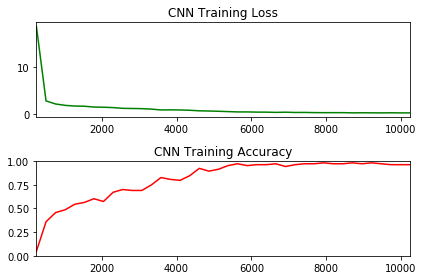

In [7]:
train_loss_plot = plt.subplot(211)
train_loss_plot.set_title('CNN Training Loss')
train_loss_plot.plot(cnn_train_batches, cnn_train_loss_batch, 'g')
train_loss_plot.set_xlim([cnn_train_batches[0], cnn_train_batches[-1]])

train_acc_plot = plt.subplot(212)
train_acc_plot.set_title('CNN Training Accuracy')
train_acc_plot.plot(cnn_train_batches, cnn_train_acc_batch, 'r')
train_acc_plot.set_ylim([0, 1.0])
train_acc_plot.set_xlim([cnn_train_batches[0], cnn_train_batches[-1]])

plt.tight_layout()
plt.show()

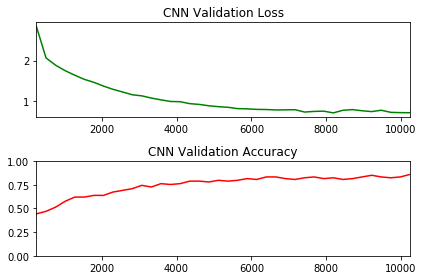

In [8]:
valid_loss_plot = plt.subplot(211)
valid_loss_plot.set_title('CNN Validation Loss')
valid_loss_plot.plot(cnn_valid_batches, cnn_valid_loss_batch, 'g')
valid_loss_plot.set_xlim([cnn_valid_batches[0], cnn_valid_batches[-1]])

valid_acc_plot = plt.subplot(212)
valid_acc_plot.set_title('CNN Validation Accuracy')
valid_acc_plot.plot(cnn_valid_batches, cnn_valid_acc_batch, 'r')
valid_acc_plot.set_ylim([0, 1.0])
valid_acc_plot.set_xlim([cnn_valid_batches[0], cnn_valid_batches[-1]])

plt.tight_layout()
plt.show()

In [4]:
output5 = open("./train_data", 'wb')
pickle.dump(train_data, output5)
db5 = open("./train_data", 'rb')
train_data = pickle.load(db5)

output6 = open("./valid_data", 'wb')
pickle.dump(valid_data, output6)
db6 = open("./valid_data", 'rb')
valid_data = pickle.load(db6)

output7 = open("./train_target", 'wb')
pickle.dump(train_target, output7)
db7 = open("./train_target", 'rb')
train_target = pickle.load(db7)

output8 = open("./valid_target", 'wb')
pickle.dump(valid_target, output8)
db8 = open("./valid_target", 'rb')
valid_target = pickle.load(db8)

In [11]:
del cnn_train_loss_batch
del cnn_valid_loss_batch
del cnn_train_acc_batch 
del cnn_valid_acc_batch 
del cnn_train_batches 
del cnn_valid_batches 

In [5]:
from text_rnn import rnn_Model
epochs=30
rnn_train_loss_batch = []
rnn_valid_loss_batch = []
rnn_train_acc_batch = []
rnn_valid_acc_batch = []
rnn_train_batches = []
rnn_valid_batches = []
rnn_max_vacc=0.0
log_batch_step=256
batch_size=64
f_va = 0.0
f_len = 0

In [6]:
with tf.Session() as sess:
    rann = rnn_Model(100, 20, 100, em_mx, 200, 2, max_len)
    tvars = tf.trainable_variables()
    grads, _ = tf.clip_by_global_norm(tf.gradients(rann.loss, tvars), 5.0)
    optimizer = tf.train.AdamOptimizer(0.001)
    train_op = optimizer.apply_gradients(zip(grads, tvars))  
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.Saver()
    batch_count = int(math.ceil(len(train_target)/batch_size))
    batch_count2 = int(math.ceil(len(valid_target)/batch_size))
    for epoch_i in tqdm(range(epochs)): 
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches') 
        for j in batches_pbar:
            batch_start = j*batch_size
            batch_seq = train_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len, k)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
            index = 0
            d = {}    
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len, k)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
            index = 0
            d = {}
            _, l, a = sess.run([train_op, rann.loss, rann.accuracy], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 0.5
                                })
            if not j % log_batch_step:
                previous_batch = rnn_train_batches[-1] if rnn_train_batches else 0
                rnn_train_batches.append(log_batch_step + previous_batch)
                rnn_train_loss_batch.append(l)
                rnn_train_acc_batch.append(a)
                    
        batches_pbar2 = tqdm(range(batch_count2), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')              
        for j in batches_pbar2:
            batch_start = j*batch_size
            batch_seq = valid_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, k)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
            index = 0
            d = {}     
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len, k)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
            index = 0
            d = {} 
            va, v_l = sess.run([rann.accuracy, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            
            if not j % log_batch_step:
                previous_batch = rnn_valid_batches[-1] if rnn_valid_batches else 0
                rnn_valid_batches.append(log_batch_step + previous_batch)
                rnn_valid_loss_batch.append(v_l)
                rnn_valid_acc_batch.append(va)
                
        v_count = 0
        input_y_list = []
        for i in range(len(valid_target)):
            input_x, y_ = div_xy(valid_data[i], valid_target[i], max_len, i)
            v_count += input_x.shape[0]
            input_y_list.extend(y_)
        input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})
        input_x_list = np.zeros((v_count, max_len), dtype=np.int32)
        index = 0
        d = {}
        temp = 0
        for i in range(len(valid_target)):
            input_x, _ = div_xy(valid_data[i], valid_target[i], max_len, i)
            for k in range(input_x.shape[0]):
                input_x_list[temp+k] = input_x[k]
            temp += input_x.shape[0]
        pred, _ = sess.run([rann.predictions, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })

        for j in range(len(valid_target)):
            cand = -1
            times = 0
            for i in range(pred.shape[0]):
                if d[i] == j:
                    if times == 0:
                        cand = pred[i]
                        times = 1
                    elif cand == pred[i]:
                        times += 1
                    else:
                        times -= 1

            if cand == valid_target[j]:
                f_va += 1.0
            f_len += 1
            
        f_va = f_va / f_len  
        index = 0
        d = {}
        if f_va > rnn_max_vacc:
            rnn_max_vacc = f_va
            saver2.save(sess,'rnn/rnn.ckpt', global_step=epoch_i)  
        f_va = 0.0
        f_len = 0
    print (rnn_max_vacc)

fw_rnn
bw_rnn
(?, 200)


Epoch  1/30:  91%|████████████████████  | 202/221 [05:30<00:31,  1.64s/batches]


Epoch  1/30: 100%|██████████████████████| 221/221 [06:01<00:00,  1.64s/batches]

Epoch  2/30:  49%|██████████▊           | 108/221 [02:59<03:07,  1.66s/batches]


Epoch  2/30: 100%|██████████████████████| 221/221 [06:08<00:00,  1.67s/batches]

Epoch  3/30:   6%|█▍                     | 14/221 [00:24<05:57,  1.73s/batches]


Epoch  3/30:  99%|█████████████████████▋| 218/221 [06:33<00:05,  1.80s/batches]


Epoch  3/30: 100%|██████████████████████| 221/221 [06:38<00:00,  1.80s/batches]

Epoch  4/30:  56%|████████████▎         | 124/221 [03:40<02:52,  1.78s/batches]


Epoch  4/30: 100%|██████████████████████| 221/221 [06:38<00:00,  1.81s/batches]

Epoch  5/30:  14%|███                    | 30/221 [00:54<05:44,  1.80s/batches]


Epoch  5/30: 100%|██████████████████████| 221/221 [07:02<00:00,  1.91s/batches]

Epoch  5/30:  16%|███▉                    | 12/74 [00:07<00:39,  1.56batches/s]


Epoch  6/30:  63%|█████████████▉        | 140/221 [04:32<02:37,  1.95s/batches]


Epoch  6/30: 100%|██████████████████████| 221/221 [07:26<00:00,  2.02s/batches]

Epoch  7/30:  21%|████▊                  | 46/221 [01:35<06:04,  2.08s/batches]


Epoch  7/30: 100%|██████████████████████| 221/221 [07:58<00:00,  2.17s/batches]

Epoch  7/30:  38%|█████████               | 28/74 [00:19<00:31,  1.46batches/s]


Epoch  8/30:  71%|███████████████▌      | 156/221 [05:32<02:18,  2.13s/batches]


Epoch  8/30: 100%|██████████████████████| 221/221 [07:56<00:00,  2.16s/batches]

Epoch  9/30:  28%|██████▍                | 62/221 [02:12<05:40,  2.14s/batches]


Epoch  9/30: 100%|██████████████████████| 221/221 [07:57<00:00,  2.16s/batches]

Epoch  9/30:  59%|██████████████▎         | 44/74 [00:31<00:21,  1.42batches/s]


Epoch 10/30:  78%|█████████████████     | 172/221 [06:18<01:47,  2.20s/batches]


Epoch 10/30: 100%|██████████████████████| 221/221 [08:07<00:00,  2.21s/batches]

Epoch 11/30:  35%|████████               | 78/221 [02:50<05:11,  2.18s/batches]


Epoch 11/30: 100%|██████████████████████| 221/221 [08:09<00:00,  2.22s/batches]

Epoch 11/30:  81%|███████████████████▍    | 60/74 [00:44<00:10,  1.35batches/s]


Epoch 12/30:  85%|██████████████████▋   | 188/221 [06:57<01:13,  2.22s/batches]


Epoch 12/30: 100%|██████████████████████| 221/221 [08:12<00:00,  2.23s/batches]

Epoch 13/30:  43%|█████████▊             | 94/221 [03:27<04:40,  2.21s/batches]


Epoch 13/30: 100%|██████████████████████| 221/221 [08:10<00:00,  2.22s/batches]

Epoch 14/30:   0%|                                | 0/221 [00:00<?, ?batches/s]


Epoch 14/30:  92%|████████████████████▎ | 204/221 [07:39<00:38,  2.25s/batches]


Epoch 14/30: 100%|██████████████████████| 221/221 [08:16<00:00,  2.25s/batches]

Epoch 15/30:  50%|██████████▉           | 110/221 [04:10<04:12,  2.28s/batches]


Epoch 15/30: 100%|██████████████████████| 221/221 [08:20<00:00,  2.27s/batches]

Epoch 16/30:   7%|█▋                     | 16/221 [00:34<07:17,  2.14s/batches]


Epoch 16/30: 100%|█████████████████████▉| 220/221 [08:02<00:02,  2.19s/batches]


Epoch 16/30: 100%|██████████████████████| 221/221 [08:04<00:00,  2.19s/batches]

Epoch 17/30:  57%|████████████▌         | 126/221 [04:31<03:24,  2.16s/batches]


Epoch 17/30: 100%|██████████████████████| 221/221 [08:13<00:00,  2.23s/batches]

Epoch 18/30:  14%|███▎                   | 32/221 [01:02<06:08,  1.95s/batches]


Epoch 18/30: 100%|██████████████████████| 221/221 [07:52<00:00,  2.14s/batches]

Epoch 18/30:  19%|████▌                   | 14/74 [00:09<00:40,  1.47batches/s]


Epoch 19/30:  64%|██████████████▏       | 142/221 [05:05<02:49,  2.15s/batches]


Epoch 19/30: 100%|██████████████████████| 221/221 [08:01<00:00,  2.18s/batches]

Epoch 20/30:  22%|████▉                  | 48/221 [01:39<05:57,  2.07s/batches]


Epoch 20/30: 100%|██████████████████████| 221/221 [07:41<00:00,  2.09s/batches]

Epoch 20/30:  41%|█████████▋              | 30/74 [00:20<00:29,  1.48batches/s]


Epoch 21/30:  71%|███████████████▋      | 158/221 [05:35<02:13,  2.12s/batches]


Epoch 21/30: 100%|██████████████████████| 221/221 [07:54<00:00,  2.15s/batches]

Epoch 22/30:  29%|██████▋                | 64/221 [02:17<05:38,  2.15s/batches]


Epoch 22/30: 100%|██████████████████████| 221/221 [07:38<00:00,  2.07s/batches]

Epoch 22/30:  62%|██████████████▉         | 46/74 [00:30<00:18,  1.49batches/s]


Epoch 23/30:  79%|█████████████████▎    | 174/221 [05:55<01:35,  2.04s/batches]


Epoch 23/30: 100%|██████████████████████| 221/221 [07:30<00:00,  2.04s/batches]

Epoch 24/30:  36%|████████▎              | 80/221 [02:35<04:33,  1.94s/batches]


Epoch 24/30: 100%|██████████████████████| 221/221 [07:44<00:00,  2.10s/batches]

Epoch 24/30:  84%|████████████████████    | 62/74 [00:44<00:08,  1.38batches/s]


Epoch 25/30:  86%|██████████████████▉   | 190/221 [06:54<01:07,  2.18s/batches]


Epoch 25/30: 100%|██████████████████████| 221/221 [08:03<00:00,  2.19s/batches]

Epoch 26/30:  43%|█████████▉             | 96/221 [03:29<04:33,  2.19s/batches]


Epoch 26/30: 100%|██████████████████████| 221/221 [08:02<00:00,  2.18s/batches]

Epoch 27/30:   1%|▏                       | 2/221 [00:03<07:07,  1.95s/batches]


Epoch 27/30:  93%|████████████████████▌ | 206/221 [07:36<00:33,  2.22s/batches]


Epoch 27/30: 100%|██████████████████████| 221/221 [08:11<00:00,  2.22s/batches]

Epoch 28/30:  51%|███████████▏          | 112/221 [04:07<04:01,  2.21s/batches]


Epoch 28/30: 100%|██████████████████████| 221/221 [08:13<00:00,  2.24s/batches]

Epoch 29/30:   8%|█▊                     | 18/221 [00:38<07:18,  2.16s/batches]


Epoch 29/30: 100%|██████████████████████| 221/221 [08:13<00:00,  2.23s/batches]

Epoch 29/30:   0%|                                 | 0/74 [00:00<?, ?batches/s]


Epoch 30/30:  58%|████████████▋         | 128/221 [04:43<03:26,  2.22s/batches]


Epoch 30/30: 100%|██████████████████████| 221/221 [08:15<00:00,  2.24s/batches]

100%|███████████████████████████████████████| 30/30 [4:46:17<00:00, 572.60s/it]


0.8754244482173175


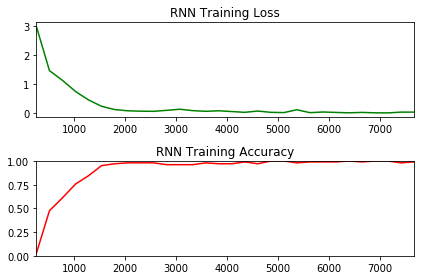

In [7]:
train_loss_plot = plt.subplot(211)
train_loss_plot.set_title('RNN Training Loss')
train_loss_plot.plot(rnn_train_batches, rnn_train_loss_batch, 'g')
train_loss_plot.set_xlim([rnn_train_batches[0], rnn_train_batches[-1]])

train_acc_plot = plt.subplot(212)
train_acc_plot.set_title('RNN Training Accuracy')
train_acc_plot.plot(rnn_train_batches, rnn_train_acc_batch, 'r')
train_acc_plot.set_ylim([0, 1.0])
train_acc_plot.set_xlim([rnn_train_batches[0], rnn_train_batches[-1]])

plt.tight_layout()
plt.show()

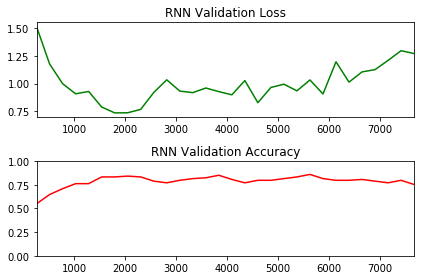

In [8]:
valid_loss_plot = plt.subplot(211)
valid_loss_plot.set_title('RNN Validation Loss')
valid_loss_plot.plot(rnn_valid_batches, rnn_valid_loss_batch, 'g')
valid_loss_plot.set_xlim([rnn_valid_batches[0], rnn_valid_batches[-1]])

valid_acc_plot = plt.subplot(212)
valid_acc_plot.set_title('RNN Validation Accuracy')
valid_acc_plot.plot(rnn_valid_batches, rnn_valid_acc_batch, 'r')
valid_acc_plot.set_ylim([0, 1.0])
valid_acc_plot.set_xlim([rnn_valid_batches[0], rnn_valid_batches[-1]])

plt.tight_layout()
plt.show()

In [9]:
del rnn_train_loss_batch
del rnn_valid_loss_batch
del rnn_train_acc_batch
del rnn_valid_acc_batch
del rnn_train_batches
del rnn_valid_batches

In [5]:
def div_x(X_, le=40):
    m = ""
    ff=np.zeros((len(X_), le), dtype=np.int32)
    for j, s in enumerate(X_):
        h=le-len(s)
        for w in s:
            m += str(em_sen[w]) + " "
        if h!=0:
            for i in range(h):
                m += "0" + " "
        m = m.strip()
        g = m.split(" ")
        sub=[]
        for gg in g:
            sub.append(int(gg))
        ff[j] = sub
        m=""
    return ff

In [5]:
def get_X(X):
    sen =[]
    for i, t in enumerate(X):
        m = []
        for j, s in enumerate(t):
            m.append(s)
        sen.append(m)
    return sen

In [6]:
max_len2 = 0    
pre_train_x = []
X_train = get_X(train_data)
for t in X_train:
    sen1 = [y for x in t for y in x]
    pre_train_x.append(sen1)
    if max_len2 < len(sen1):
        max_len2 = len(sen1)
        
pre_test_x = []
X_test = get_X(valid_data)
for t in X_test:
    sen2 = [y for x in t for y in x]
    pre_test_x.append(sen2)
    if max_len2 < len(sen2):
        max_len2 = len(sen2)
        
print (max_len2)

7337


In [7]:
from text_attn import attn_Model
epochs=30
attn_train_loss_batch = []
attn_valid_loss_batch = []
attn_train_acc_batch = []
attn_valid_acc_batch = []
attn_train_batches = []
attn_valid_batches = []
attn_max_vacc=0.0
log_batch_step=256
batch_size=64
f_va = 0.0
f_len = 0

In [8]:
with tf.Session() as sess:
    rann = attn_Model(20, 100, em_mx, max_len2)
    optimizer = tf.train.AdamOptimizer(0.001).minimize(rann.loss)
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.Saver()
    batch_count = int(math.ceil(len(train_target)/batch_size))
    batch_count2 = int(math.ceil(len(valid_target)/batch_size))
    for epoch_i in tqdm(range(epochs)): 
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches') 
        for j in batches_pbar:
            batch_start = j*batch_size
            x_batch_seq = pre_train_x[batch_start:batch_start + batch_size]
            y_batch_seq = train_target[batch_start:batch_start + batch_size]
            input_y = sess.run(rann.y, feed_dict = {rann.onehot : y_batch_seq})
            input_x = div_x(x_batch_seq, max_len2)
            _, l, a = sess.run([optimizer, rann.loss, rann.accuracy], feed_dict = {
                                  rann.encoder_inputs : input_x,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 0.5
                                })
            if not j % log_batch_step:
                previous_batch = attn_train_batches[-1] if attn_train_batches else 0
                attn_train_batches.append(log_batch_step + previous_batch)
                attn_train_loss_batch.append(l)
                attn_train_acc_batch.append(a)
                
        batches_pbar2 = tqdm(range(batch_count2), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')              
        for j in batches_pbar2:
            batch_start = j*batch_size
            x_batch_seq = pre_test_x[batch_start:batch_start + batch_size]
            y_batch_seq = valid_target[batch_start:batch_start + batch_size]
            input_y = sess.run(rann.y, feed_dict = {rann.onehot : y_batch_seq})
            input_x = div_x(x_batch_seq, max_len2)
            va, v_l = sess.run([rann.accuracy, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            
            if not j % log_batch_step:
                previous_batch = attn_valid_batches[-1] if attn_valid_batches else 0
                attn_valid_batches.append(log_batch_step + previous_batch)
                attn_valid_loss_batch.append(v_l)
                attn_valid_acc_batch.append(va)
        
        for j in batches_pbar2:
            batch_start = j*batch_size
            x_batch_seq = pre_test_x[batch_start:batch_start + batch_size]
            y_batch_seq = valid_target[batch_start:batch_start + batch_size]
            f_len += batch_size
            input_y = sess.run(rann.y, feed_dict = {rann.onehot : y_batch_seq})
            input_x = div_x(x_batch_seq, max_len2)
            va2, v_l = sess.run([rann.accuracy2, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            f_va += va2
        
        f_va = f_va / f_len
        if f_va>attn_max_vacc:
            attn_max_vacc = f_va
            saver3.save(sess,'attn/attn.ckpt', global_step=epoch_i)  
        f_va = 0.0
        f_len = 0
    print (attn_max_vacc)

Epoch  1/30:  91%|████████████████████  | 202/221 [19:38<01:50,  5.83s/batches]


Epoch  1/30: 100%|██████████████████████| 221/221 [21:29<00:00,  5.83s/batches]

Epoch  2/30:  49%|██████████▊           | 108/221 [10:25<10:54,  5.79s/batches]


Epoch  2/30: 100%|██████████████████████| 221/221 [21:30<00:00,  5.84s/batches]

Epoch  3/30:   6%|█▍                     | 14/221 [01:22<20:19,  5.89s/batches]


Epoch  3/30:  99%|█████████████████████▋| 218/221 [21:39<00:17,  5.96s/batches]


Epoch  3/30: 100%|██████████████████████| 221/221 [21:56<00:00,  5.96s/batches]

Epoch  4/30:  56%|████████████▎         | 124/221 [12:32<09:48,  6.07s/batches]


Epoch  4/30: 100%|██████████████████████| 221/221 [22:07<00:00,  6.01s/batches]

Epoch  5/30:  14%|███                    | 30/221 [02:56<18:43,  5.88s/batches]


Epoch  5/30: 100%|██████████████████████| 221/221 [21:57<00:00,  5.96s/batches]

Epoch  5/30:  16%|███▉                    | 12/74 [00:31<02:43,  2.64s/batches]


Epoch  6/30:  63%|█████████████▉        | 140/221 [13:52<08:01,  5.95s/batches]


Epoch  6/30: 100%|██████████████████████| 221/221 [21:53<00:00,  5.95s/batches]

Epoch  7/30:  21%|████▊                  | 46/221 [04:31<17:13,  5.91s/batches]


Epoch  7/30: 100%|██████████████████████| 221/221 [21:37<00:00,  5.87s/batches]

Epoch  7/30:  38%|█████████               | 28/74 [01:15<02:04,  2.70s/batches]


Epoch  8/30:  71%|███████████████▌      | 156/221 [15:22<06:24,  5.91s/batches]


Epoch  8/30: 100%|██████████████████████| 221/221 [21:44<00:00,  5.90s/batches]

Epoch  9/30:  28%|██████▍                | 62/221 [06:08<15:44,  5.94s/batches]


Epoch  9/30: 100%|██████████████████████| 221/221 [21:51<00:00,  5.94s/batches]

Epoch  9/30:  59%|██████████████▎         | 44/74 [01:56<01:19,  2.64s/batches]


Epoch 10/30:  78%|█████████████████     | 172/221 [17:15<04:55,  6.02s/batches]


Epoch 10/30: 100%|██████████████████████| 221/221 [22:10<00:00,  6.02s/batches]

Epoch 11/30:  35%|████████               | 78/221 [07:49<14:20,  6.01s/batches]


Epoch 11/30: 100%|██████████████████████| 221/221 [22:00<00:00,  5.98s/batches]

Epoch 11/30:  81%|███████████████████▍    | 60/74 [02:45<00:38,  2.77s/batches]


Epoch 12/30:  85%|██████████████████▋   | 188/221 [18:58<03:19,  6.05s/batches]


Epoch 12/30: 100%|██████████████████████| 221/221 [22:16<00:00,  6.05s/batches]

Epoch 13/30:  43%|█████████▊             | 94/221 [09:28<12:48,  6.05s/batches]


Epoch 13/30: 100%|██████████████████████| 221/221 [22:15<00:00,  6.04s/batches]

Epoch 14/30:   0%|                                | 0/221 [00:00<?, ?batches/s]


Epoch 14/30:  92%|████████████████████▎ | 204/221 [20:33<01:42,  6.05s/batches]


Epoch 14/30: 100%|██████████████████████| 221/221 [22:15<00:00,  6.04s/batches]

Epoch 15/30:  50%|██████████▉           | 110/221 [11:06<11:12,  6.06s/batches]


Epoch 15/30: 100%|██████████████████████| 221/221 [22:18<00:00,  6.06s/batches]

Epoch 16/30:   7%|█▋                     | 16/221 [01:35<20:28,  5.99s/batches]


Epoch 16/30: 100%|█████████████████████▉| 220/221 [22:07<00:06,  6.03s/batches]


Epoch 16/30: 100%|██████████████████████| 221/221 [22:12<00:00,  6.03s/batches]

Epoch 17/30:  57%|████████████▌         | 126/221 [12:36<09:30,  6.00s/batches]


Epoch 17/30: 100%|██████████████████████| 221/221 [21:56<00:00,  5.96s/batches]

Epoch 18/30:  14%|███▎                   | 32/221 [03:12<18:55,  6.01s/batches]


Epoch 18/30: 100%|██████████████████████| 221/221 [22:13<00:00,  6.03s/batches]

Epoch 18/30:  19%|████▌                   | 14/74 [00:37<02:39,  2.66s/batches]


Epoch 19/30:  64%|██████████████▏       | 142/221 [14:24<08:00,  6.09s/batches]


Epoch 19/30: 100%|██████████████████████| 221/221 [22:24<00:00,  6.08s/batches]

Epoch 20/30:  22%|████▉                  | 48/221 [04:50<17:25,  6.04s/batches]


Epoch 20/30: 100%|██████████████████████| 221/221 [22:18<00:00,  6.06s/batches]

Epoch 20/30:  41%|█████████▋              | 30/74 [01:23<02:02,  2.79s/batches]


Epoch 21/30:  71%|███████████████▋      | 158/221 [16:01<06:23,  6.08s/batches]


Epoch 21/30: 100%|██████████████████████| 221/221 [22:22<00:00,  6.08s/batches]

Epoch 22/30:  29%|██████▋                | 64/221 [06:28<15:53,  6.07s/batches]


Epoch 22/30: 100%|██████████████████████| 221/221 [22:15<00:00,  6.04s/batches]

Epoch 22/30:  62%|██████████████▉         | 46/74 [02:05<01:16,  2.73s/batches]


Epoch 23/30:  79%|█████████████████▎    | 174/221 [17:40<04:46,  6.09s/batches]


Epoch 23/30: 100%|██████████████████████| 221/221 [22:26<00:00,  6.09s/batches]

Epoch 24/30:  36%|████████▎              | 80/221 [08:05<14:15,  6.07s/batches]


Epoch 24/30: 100%|██████████████████████| 221/221 [22:17<00:00,  6.05s/batches]

Epoch 24/30:  84%|████████████████████    | 62/74 [02:52<00:33,  2.78s/batches]


Epoch 25/30:  86%|██████████████████▉   | 190/221 [19:29<03:10,  6.16s/batches]


Epoch 25/30: 100%|██████████████████████| 221/221 [22:41<00:00,  6.16s/batches]

Epoch 26/30:  43%|█████████▉             | 96/221 [09:49<12:47,  6.14s/batches]


Epoch 26/30: 100%|██████████████████████| 221/221 [22:40<00:00,  6.16s/batches]

Epoch 27/30:   1%|▏                       | 2/221 [00:12<22:03,  6.04s/batches]


Epoch 27/30:  93%|████████████████████▌ | 206/221 [20:59<01:31,  6.11s/batches]


Epoch 27/30: 100%|██████████████████████| 221/221 [22:29<00:00,  6.11s/batches]

Epoch 28/30:  51%|███████████▏          | 112/221 [11:17<10:59,  6.05s/batches]


Epoch 28/30: 100%|██████████████████████| 221/221 [22:11<00:00,  6.03s/batches]

Epoch 29/30:   8%|█▊                     | 18/221 [01:48<20:26,  6.04s/batches]


Epoch 29/30: 100%|██████████████████████| 221/221 [22:01<00:00,  5.98s/batches]

Epoch 29/30:   0%|                                 | 0/74 [00:00<?, ?batches/s]


Epoch 30/30:  58%|████████████▋         | 128/221 [12:40<09:12,  5.94s/batches]


Epoch 30/30: 100%|██████████████████████| 221/221 [21:56<00:00,  5.96s/batches]

100%|█████████████████████████████████████| 30/30 [14:25:24<00:00, 1730.82s/it]


0.837626689189


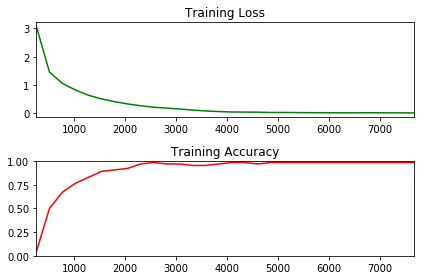

In [9]:
train_loss_plot = plt.subplot(211)
train_loss_plot.set_title('Training Loss')
train_loss_plot.plot(attn_train_batches, attn_train_loss_batch, 'g')
train_loss_plot.set_xlim([attn_train_batches[0], attn_train_batches[-1]])

train_acc_plot = plt.subplot(212)
train_acc_plot.set_title('Training Accuracy')
train_acc_plot.plot(attn_train_batches, attn_train_acc_batch, 'r')
train_acc_plot.set_ylim([0, 1.0])
train_acc_plot.set_xlim([attn_train_batches[0], attn_train_batches[-1]])

plt.tight_layout()
plt.show()

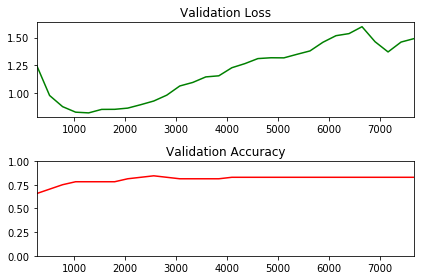

In [10]:
valid_loss_plot = plt.subplot(211)
valid_loss_plot.set_title('Validation Loss')
valid_loss_plot.plot(attn_valid_batches, attn_valid_loss_batch, 'g')
valid_loss_plot.set_xlim([attn_valid_batches[0], attn_valid_batches[-1]])

valid_acc_plot = plt.subplot(212)
valid_acc_plot.set_title('Validation Accuracy')
valid_acc_plot.plot(attn_valid_batches, attn_valid_acc_batch, 'r')
valid_acc_plot.set_ylim([0, 1.0])
valid_acc_plot.set_xlim([attn_valid_batches[0], attn_valid_batches[-1]])

plt.tight_layout()
plt.show()

In [6]:
output9 = open("./pre_test_x", 'wb')
pickle.dump(pre_test_x, output9)
db9 = open("./pre_test_x", 'rb')
pre_test_x = pickle.load(db9)

In [8]:
def major(lt):
    cand=-1
    times=0
    for i in range(len(lt)):
        if times==0:
            cand = lt[i]
            times = 1
        elif lt[i]==cand:
            times+=1
        else:
            times-=1
    return cand

In [9]:
g1 = tf.Graph()
g2 = tf.Graph()
g3 = tf.Graph()

sess1 = tf.Session(graph=g1)
sess2 = tf.Session(graph=g2)
sess3 = tf.Session(graph=g3)

scores = None
rnn_probs = None
attn_preds = None
cnn_input_x = None
cnn_dropout = None
rnn_input_x = None
rnn_dropout = None

with sess1.as_default(): 
    with g1.as_default():
        saver1 = tf.train.import_meta_graph('cnn/cnn.ckpt-31.meta')
        model_file1 = tf.train.latest_checkpoint('cnn/')
        saver1.restore(sess1, model_file1)
        scores = g1.get_tensor_by_name("scores:0")
        cnn_input_x = g1.get_tensor_by_name("cnn_encoder_inputs:0")
        cnn_dropout = g1.get_tensor_by_name("cnn_dropout_keep_prob:0")
        
with sess2.as_default(): 
    with g2.as_default():
        saver2 = tf.train.import_meta_graph('rnn/rnn.ckpt-23.meta')
        model_file2 = tf.train.latest_checkpoint('rnn/')
        saver2.restore(sess2, model_file2)
        rnn_probs = g2.get_tensor_by_name("rnn_prob:0")
        rnn_input_x = g2.get_tensor_by_name("rnn_encoder_inputs:0")
        rnn_dropout = g2.get_tensor_by_name("rnn_dropout_keep_prob:0")
        
with sess3.as_default(): 
    with g3.as_default():
        saver3 = tf.train.import_meta_graph('attn/attn.ckpt-11.meta')
        model_file3 = tf.train.latest_checkpoint('attn/')
        saver3.restore(sess3, model_file3)
        attn_preds = g3.get_tensor_by_name("attn_predictions:0")
        attn_input_x = g3.get_tensor_by_name("attn_encoder_inputs:0")
        attn_dropout = g3.get_tensor_by_name("attn_dropout_keep_prob:0")

v_count = 0
for i in range(len(valid_target)):
    input_x, _ = div_xy(valid_data[i], valid_target[i], max_len, i)
    v_count += input_x.shape[0]
input_x_list = np.zeros((v_count, max_len), dtype=np.int32)
index = 0
d = {}
temp = 0
for i in range(len(valid_target)):
    input_x, _ = div_xy(valid_data[i], valid_target[i], max_len, i)
    for k in range(input_x.shape[0]):
        input_x_list[temp+k] = input_x[k]
    temp += input_x.shape[0]
    
    
p1 = sess1.run(scores, feed_dict={
            cnn_input_x: input_x_list,
            cnn_dropout: 1.0
        })

p2 = sess2.run(rnn_probs, feed_dict={
            rnn_input_x: input_x_list,
            rnn_dropout: 1.0
        })

f_list = []
for j in range(len(valid_target)):
    cand = -1
    times = 0
    for i in range(p1.shape[0]):
        if d[i] == j:
            if times == 0:
                cand = np.argmax(p1[i])
                times = 1
            elif cand == np.argmax(p1[i]):
                times += 1
            else:
                times -= 1
    f_list.append(cand)
    
f_list2 = []
for j in range(len(valid_target)):
    cand = -1
    times = 0
    for i in range(p2.shape[0]):
        if d[i] == j:
            if times == 0:
                cand = np.argmax(p2[i])
                times = 1
            elif cand == np.argmax(p2[i]):
                times += 1
            else:
                times -= 1
    f_list2.append(cand)
    
d = {}
f_list3 = []    
batch_count = int(math.ceil(len(valid_target)/batch_size))
batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(1, 1), unit='batches')
for j in batches_pbar:
    batch_start = j*batch_size
    x_batch_seq = pre_test_x[batch_start:batch_start + batch_size]
    input_x = div_x(x_batch_seq, max_len2)
    ps = sess3.run(attn_preds, feed_dict = {
                          attn_input_x : input_x,
                          attn_dropout : 1.0
                        })
    for i in range(ps.shape[0]):
        f_list3.append(ps[i])

ff = []
for i in range(0,len(f_list3)):
    ff2 = []
    ff2.append(f_list[i])
    ff2.append(f_list2[i])
    ff2.append(f_list3[i])
    ff.append(major(ff2))

for i in range(0,len(ff)):
    if ff[i] == valid_target[i]:
        f_va += 1.0
vacc = f_va / len(ff)
print (vacc)
sess1.close()
sess2.close()
sess3.close()

INFO:tensorflow:Restoring parameters from cnn/cnn.ckpt-31
INFO:tensorflow:Restoring parameters from rnn/rnn.ckpt-23
INFO:tensorflow:Restoring parameters from attn/attn.ckpt-11


Epoch  1/1: 100%|█████████████████████████| 74/74 [03:01<00:00,  2.45s/batches]


0.9061969439728353


In [9]:
from tensorflow.contrib.framework.python.framework import checkpoint_utils
var_list = checkpoint_utils.list_variables("cnn")
for v in var_list:
    print(v)

('W', [300, 20])
('W/Adam', [300, 20])
('W/Adam_1', [300, 20])
('b', [20])
('b/Adam', [20])
('b/Adam_1', [20])
('beta1_power', [])
('beta2_power', [])
('cnn_embedding/em', [119019, 100])
('cnn_embedding/em/Adam', [119019, 100])
('cnn_embedding/em/Adam_1', [119019, 100])
('conv-maxpool-2/W', [2, 100, 1, 100])
('conv-maxpool-2/W/Adam', [2, 100, 1, 100])
('conv-maxpool-2/W/Adam_1', [2, 100, 1, 100])
('conv-maxpool-2/b', [100])
('conv-maxpool-2/b/Adam', [100])
('conv-maxpool-2/b/Adam_1', [100])
('conv-maxpool-3/W', [3, 100, 1, 100])
('conv-maxpool-3/W/Adam', [3, 100, 1, 100])
('conv-maxpool-3/W/Adam_1', [3, 100, 1, 100])
('conv-maxpool-3/b', [100])
('conv-maxpool-3/b/Adam', [100])
('conv-maxpool-3/b/Adam_1', [100])
('conv-maxpool-4/W', [4, 100, 1, 100])
('conv-maxpool-4/W/Adam', [4, 100, 1, 100])
('conv-maxpool-4/W/Adam_1', [4, 100, 1, 100])
('conv-maxpool-4/b', [100])
('conv-maxpool-4/b/Adam', [100])
('conv-maxpool-4/b/Adam_1', [100])


In [2]:
import pickle
db = open("sample_X", 'rb')
X = pickle.load(db)
db1 = open("sample_Y", 'rb')
Y = pickle.load(db1)

In [3]:
sen =[]
for i, t in enumerate(X):
    m = []
    for j, s in enumerate(t):
        m.append(s)
    sen.append((m, Y[i]))

In [4]:
from sklearn.model_selection import train_test_split
x, y = zip(*sen)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1234)

In [5]:
for i in range(len(y_train)):
    label = '__label__' + str(y_train[i])
    X_train[i].append([label])

In [6]:
with open('train_ft.txt', 'w') as f:
    for t in X_train:
        sen = [y for x in t for y in x]
        www = " ".join(sen)
        f.write(www+'\n')

In [7]:
xx = []
for t in X_test:
    sen = [y for x in t for y in x]
    www = " ".join(sen)
    xx.append(www)

In [8]:
import fasttext
from sklearn import metrics
import numpy as np
clf = fasttext.supervised('train_ft.txt', 'model', dim=200, ws=5, neg=5, epoch=100, min_count=10, lr=0.1, lr_update_rate=1000, bucket=200000)
labels = clf.predict(xx)
y_preds = np.array(labels).flatten().astype(int)
m_precision = metrics.precision_score(y_test, y_preds, average='micro')
print (m_precision)

0.883913412564
